In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d danukhan/aptos-full-dataset-2019

 98% 609M/621M [00:07<00:00, 91.3MB/s]
100% 621M/621M [00:07<00:00, 82.4MB/s]


In [ ]:
#unzipping
import zipfile
zip_ref = zipfile.ZipFile('/content/aptos-full-dataset-2019.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:

import cv2
from google.colab.patches import cv2_imshow
import os
import random
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/APTOSdataset_label.csv')

In [ ]:
df.sample(5)

,id_code,diagnosis
3633,fe0e2dee1834,0
3014,d1a60c3b9fe5,0
322,18621b9ca978,0
2624,b65ff67743b2,2
2135,96a9706b8534,1


In [ ]:
#df['diagnosis']=df['diagnosis'].apply(lambda x : 0 if x ==0 else 1)

In [ ]:
img_path = '/content/APTOSdataset/APTOSdataset/'
df['image_path'] = img_path + df.id_code + '.jpg'


diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferat_DR'
}

df['type'] = df['diagnosis'].map(diagnosis_dict.get)
df.head(5)

,id_code,diagnosis,image_path,type
0,000c1434d8d7,2,/content/APTOSdataset/APTOSdataset/000c1434d8d...,Moderate
1,001639a390f0,4,/content/APTOSdataset/APTOSdataset/001639a390f...,Proliferat_DR
2,0024cdab0c1e,1,/content/APTOSdataset/APTOSdataset/0024cdab0c1...,Mild
3,002c21358ce6,0,/content/APTOSdataset/APTOSdataset/002c21358ce...,No_DR
4,005b95c28852,0,/content/APTOSdataset/APTOSdataset/005b95c2885...,No_DR


In [ ]:
print('no. of NO DR cases',(df['diagnosis']==0).sum())
print('no. of Mild cases',(df['diagnosis']==1).sum())
print('no. of Moderate cases',(df['diagnosis']==2).sum())
print('no. of Severe cases',(df['diagnosis']==3).sum())
print('no. of Proliferat DRcases',(df['diagnosis']==4).sum())

no. of NO DR cases 1805
no. of Mild cases 370
no. of Moderate cases 999
no. of Severe cases 193
no. of Proliferat DRcases 295


<Axes: >

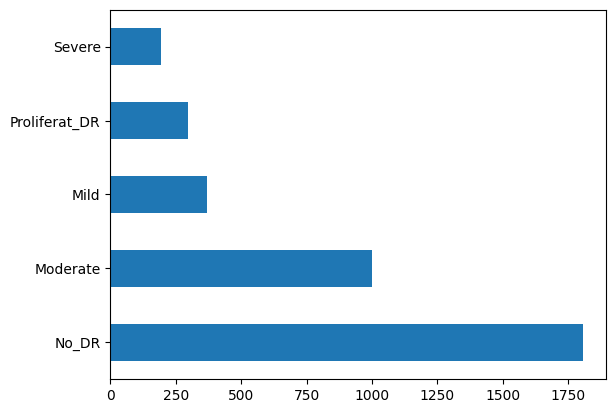

In [ ]:
df['type'].value_counts().plot(kind='barh')

In [ ]:
#sampling

c_nodr,c_moderate,c_mild,c_proliferat,c_severe=df['type'].value_counts()
nodr = df[df['diagnosis'] == 0]
mild = df[df['diagnosis'] == 1]
moderate = df[df['diagnosis'] == 2]
severe = df[df['diagnosis'] == 3]
proliferat = df[df['diagnosis'] == 4]
print(nodr.shape)
print(mild.shape)
print(moderate.shape)
print(severe.shape)
print(proliferat.shape)
mild_over = mild.sample(c_nodr, replace=True)
moderate_over = moderate.sample(c_nodr, replace=True)
severe_over = severe.sample(c_nodr, replace=True)
proliferat_over = proliferat.sample(c_nodr, replace=True)
print(nodr.shape)
print(mild_over.shape)
print(moderate_over.shape)
print(severe_over.shape)
print(proliferat_over.shape)
df_final = pd.concat([nodr, mild_over], axis=0)
df_final = pd.concat([df_final, moderate_over], axis=0)
df_final = pd.concat([df_final, severe_over], axis=0)
df_final = pd.concat([df_final, proliferat_over], axis=0)

df_final = df_final.sample(frac = 1)

df=df_final

(1805, 4)
(370, 4)
(999, 4)
(193, 4)
(295, 4)
(1805, 4)
(1805, 4)
(1805, 4)
(1805, 4)
(1805, 4)


In [ ]:
#adding new data

!kaggle datasets download -d danukhan/eyepacs-2015-full-dataset-35k
#unzipping
import zipfile
zip_ref = zipfile.ZipFile('/content/eyepacs-2015-full-dataset-35k.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

df_temp=pd.read_csv('/content/eyePACS_dataset.csv')

img_path = '/content/eyePACS_dataset/eyePACS_dataset/'
df_temp['image_path'] = img_path + df_temp.image + '.jpeg'


diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferat_DR'
}

df_temp['type'] = df_temp['level'].map(diagnosis_dict.get)

df_temp.drop(columns=['Unnamed: 0.1'	,'Unnamed: 0'],inplace=True)
df_temp.rename(columns = {'level':'diagnosis'}, inplace = True)
df_temp.rename(columns = {'image':'id_code'}, inplace = True)

pro=df_temp[df_temp['diagnosis']==4].sample(708)
sev=df_temp[df_temp['diagnosis']==3].sample(872)
mod=df_temp[df_temp['diagnosis']==2].sample(300)
mil=df_temp[df_temp['diagnosis']==1].sample(708)

df_add=pd.concat([pro,sev],axis=0)
df_add=pd.concat([df_add,mod],axis=0)
df_add=pd.concat([df_add,mil],axis=0)

df=pd.concat([df,df_add],axis=0)

df.shape

eyepacs-2015-full-dataset-35k.zip: Skipping, found more recently modified local copy (use --force to force download)


(6250, 4)

In [ ]:
# Split into stratified train, val, and test sets

from sklearn.model_selection import train_test_split

train_intermediate, val = train_test_split(df, test_size = 0.05, stratify = df['type'])
train, test = train_test_split(train_intermediate, test_size = 0.05 / (1 - 0.05), stratify = train_intermediate['type'])

print(train['type'].value_counts(), '\n')

print(test['type'].value_counts(), '\n')

print(val['type'].value_counts(), '\n')


No_DR            1623
Moderate         1169
Mild              970
Severe            959
Proliferat_DR     903
Name: type, dtype: int64 

No_DR            91
Moderate         65
Mild             54
Severe           53
Proliferat_DR    50
Name: type, dtype: int64 

No_DR            91
Moderate         65
Mild             54
Severe           53
Proliferat_DR    50
Name: type, dtype: int64 



In [ ]:
t=cv2.imread('/content/APTOSdataset/APTOSdataset/000c1434d8d7.jpg')
t.shape

(807, 1024, 3)

In [ ]:
#preprocessing
#Applying CLAHE

!kaggle datasets download -d danukhan/aptos-dataset-clahe-method-2019

#unzipping
import zipfile
zip_ref = zipfile.ZipFile('/content/aptos-dataset-clahe-method-2019.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

df=pd.read_csv('/content/APTOSdataset_label.csv')

img_path = '/content/aptos_clahe/aptos_clahe/'
df['image_path'] = img_path + df.id_code + '.jpg'


diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferat_DR'
}

df['type'] = df['diagnosis'].map(diagnosis_dict.get)

print('no. of NO DR cases',(df['diagnosis']==0).sum())
print('no. of Mild cases',(df['diagnosis']==1).sum())
print('no. of Moderate cases',(df['diagnosis']==2).sum())
print('no. of Severe cases',(df['diagnosis']==3).sum())
print('no. of Proliferat DRcases',(df['diagnosis']==4).sum())

# Split into stratified train, val, and test sets

from sklearn.model_selection import train_test_split

train_intermediate, val = train_test_split(df, test_size = 0.05, stratify = df['type'])
train, test = train_test_split(train_intermediate, test_size = 0.05 / (1 - 0.05), stratify = train_intermediate['type'])

print(train['type'].value_counts(), '\n')

print(test['type'].value_counts(), '\n')

print(val['type'].value_counts(), '\n')

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img




# Define the ImageDataGenerator for data augmentation (adjust parameters as needed)
datagen = ImageDataGenerator(
    rescale=1./255,
    #featurewise_center=True, featurewise_std_normalization=True,
    rotation_range=30,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant',
    #brightness_range=(0,1),
    vertical_flip=True
)

# Define the batch size and image size
batch_size = 16
img_size = (224, 224)

# Create the training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='/content/aptos_clahe/aptos_clahe',
    x_col='image_path',  # Column in the CSV file containing image paths
    y_col='type',       # Column in the CSV file containing labels
    class_mode='sparse',   # Use 'binary' for binary classification, categorical for OHE, sparse for int values
    target_size=img_size,
    batch_size=batch_size,
    classes={'No_DR': 0,'Mild': 1, 'Moderate':2, 'Severe':3, 'Proliferat_DR':4}
)



# Create the validation data generator
val_generator = datagen.flow_from_dataframe(
    dataframe=val,
    directory='/content/aptos_clahe/aptos_clahe',
    x_col='image_path',
    y_col='type',
    class_mode='sparse',
    target_size=img_size,
    batch_size=batch_size,
    classes={'No_DR': 0,'Mild': 1, 'Moderate':2, 'Severe':3, 'Proliferat_DR':4}
)


100% 1.42G/1.43G [01:01<00:00, 36.4MB/s]
100% 1.43G/1.43G [01:01<00:00, 24.9MB/s]
no. of NO DR cases 1805
no. of Mild cases 370
no. of Moderate cases 999
no. of Severe cases 193
no. of Proliferat DRcases 295
No_DR            1623
Moderate          899
Mild              334
Proliferat_DR     265
Severe            173
Name: type, dtype: int64 

No_DR            91
Moderate         50
Mild             18
Proliferat_DR    15
Severe           10
Name: type, dtype: int64 

No_DR            91
Moderate         50
Mild             18
Proliferat_DR    15
Severe           10
Name: type, dtype: int64 

Found 3294 validated image filenames belonging to 5 classes.
Found 184 validated image filenames belonging to 5 classes.


In [ ]:
#preprocessing
#applying Grahams method

!kaggle datasets download -d danukhan/aptos-dataset-gaussian-filtered-2019

#unzipping
import zipfile
zip_ref = zipfile.ZipFile('/content/aptos-dataset-gaussian-filtered-2019.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

df=pd.read_csv('/content/aptos224x224_gaussian/train.csv')

img_path = '/content/aptos224x224_gaussian/gaussian_filtered_images/gaussian_filtered_images/'
df['image_path'] = img_path + df.id_code + '.png'


diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferat_DR'
}

df['type'] = df['diagnosis'].map(diagnosis_dict.get)

print('no. of NO DR cases',(df['diagnosis']==0).sum())
print('no. of Mild cases',(df['diagnosis']==1).sum())
print('no. of Moderate cases',(df['diagnosis']==2).sum())
print('no. of Severe cases',(df['diagnosis']==3).sum())
print('no. of Proliferat DRcases',(df['diagnosis']==4).sum())

# Split into stratified train, val, and test sets

from sklearn.model_selection import train_test_split

train_intermediate, val = train_test_split(df, test_size = 0.05, stratify = df['type'])
train, test = train_test_split(train_intermediate, test_size = 0.05 / (1 - 0.05), stratify = train_intermediate['type'])

print(train['type'].value_counts(), '\n')

print(test['type'].value_counts(), '\n')

print(val['type'].value_counts(), '\n')

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img




# Define the ImageDataGenerator for data augmentation (adjust parameters as needed)
datagen = ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
)

# Define the batch size and image size
batch_size = 16
img_size = (224, 224)

# Create the training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='/content/aptos224x224_gaussian/gaussian_filtered_images/gaussian_filtered_images',
    x_col='image_path',  # Column in the CSV file containing image paths
    y_col='type',       # Column in the CSV file containing labels
    class_mode='sparse',   # Use 'binary' for binary classification, categorical for OHE, sparse for int values
    target_size=img_size,
    batch_size=batch_size,
    classes={'No_DR': 0,'Mild': 1, 'Moderate':2, 'Severe':3, 'Proliferat_DR':4}
)



# Create the validation data generator
val_generator = datagen.flow_from_dataframe(
    dataframe=val,
    directory='/content/aptos224x224_gaussian/gaussian_filtered_images/gaussian_filtered_images',
    x_col='image_path',
    y_col='type',
    class_mode='sparse',
    target_size=img_size,
    batch_size=batch_size,
    classes={'No_DR': 0,'Mild': 1, 'Moderate':2, 'Severe':3, 'Proliferat_DR':4}
)


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img




# Define the ImageDataGenerator for data augmentation (adjust parameters as needed)
datagen = ImageDataGenerator(
    rescale=1./255,
    #featurewise_center=True, featurewise_std_normalization=True,
    rotation_range=30,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant',
    #brightness_range=(0,1),
    vertical_flip=True
)

# Define the batch size and image size
batch_size = 16
img_size = (224, 224)

# Create the training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='/content/APTOSdataset/APTOSdataset',
    x_col='image_path',  # Column in the CSV file containing image paths
    y_col='type',       # Column in the CSV file containing labels
    class_mode='sparse',   # Use 'binary' for binary classification, categorical for OHE, sparse for int values
    target_size=img_size,
    batch_size=batch_size,
    classes={'No_DR': 0,'Mild': 1, 'Moderate':2, 'Severe':3, 'Proliferat_DR':4}
)



# Create the validation data generator
val_generator = datagen.flow_from_dataframe(
    dataframe=val,
    directory='/content/APTOSdataset/APTOSdataset',
    x_col='image_path',
    y_col='type',
    class_mode='sparse',
    target_size=img_size,
    batch_size=batch_size,
    classes={'No_DR': 0,'Mild': 1, 'Moderate':2, 'Severe':3, 'Proliferat_DR':4}
)


Found 5624 validated image filenames belonging to 5 classes.
Found 313 validated image filenames belonging to 5 classes.


In [ ]:
train_generator.class_indices

{'No_DR': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Proliferat_DR': 4}

In [ ]:
#model

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential, Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization

In [ ]:
initializer = tensorflow.keras.initializers.HeNormal(seed=42)

In [ ]:
convo_base=keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)

In [ ]:
convo_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, 111, 111, 32)         96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
# conv_base.trainable = True

# set_trainable = False

# for layer in conv_base.layers:
#   #if layer.name == 'conv2d_81':
#   if layer.name=='input_1':
#     set_trainable = True
#   if set_trainable:
#     layer.trainable = True
#   else:
#     layer.trainable = False



# for layer in conv_base.layers:
#   print(layer.name,layer.trainable)


In [ ]:
model = Sequential()

model.add(convo_base)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dropout(0.2))
model.add(Dense(512,activation='relu',kernel_initializer=initializer))
model.add(Dense(5, activation='softmax',kernel_initializer=initializer))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                                 
 dense_9 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 22854437 (87.18 MB)
Trainable params: 22820005 (87.05 MB)
Non-trainable params: 34432 (134.50 KB)
________

In [ ]:
#model.compile(
#    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True,weight_decay=0.0005),
#    loss='sparse_categorical_crossentropy',
#   metrics=['accuracy']
#  )
model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=keras.optimizers.SGD(learning_rate=0.001),
        metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)
callback_list=[earlystopping]

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=5624//batch_size,#8121//batch_size,#3294//batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=313//batch_size,#452//batch_size,#184//batch_size,
    callbacks=callback_list)

Epoch 1/20
351/351 [==============================] - 111s 316ms/step - loss: 1.1454 - accuracy: 0.5428 - val_loss: 1.0877 - val_accuracy: 0.5691
Epoch 3/20
351/351 [==============================] - 116s 330ms/step - loss: 1.0129 - accuracy: 0.6049 - val_loss: 0.9956 - val_accuracy: 0.6151
Epoch 4/20
351/351 [==============================] - 114s 325ms/step - loss: 0.9528 - accuracy: 0.6259 - val_loss: 0.9795 - val_accuracy: 0.5921
Epoch 5/20
351/351 [==============================] - 110s 314ms/step - loss: 0.9042 - accuracy: 0.6455 - val_loss: 0.9225 - val_accuracy: 0.6414
Epoch 6/20
351/351 [==============================] - 116s 329ms/step - loss: 0.8589 - accuracy: 0.6619 - val_loss: 0.9258 - val_accuracy: 0.6250
Epoch 7/20
351/351 [==============================] - 112s 319ms/step - loss: 0.8339 - accuracy: 0.6753 - val_loss: 0.9311 - val_accuracy: 0.6447
Epoch 8/20
351/351 [==============================] - 114s 326ms/step - loss: 0.8073 - accuracy: 0.6919 - val_loss: 0.8641 -

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=5624//batch_size,#8121//batch_size,#3294//batch_size,
    epochs=40,
    validation_data=val_generator,
    validation_steps=313//batch_size,#452//batch_size,#184//batch_size,
    callbacks=callback_list,
    initial_epoch=20)

Epoch 21/40
351/351 [==============================] - 113s 322ms/step - loss: 0.6323 - accuracy: 0.7511 - val_loss: 0.7442 - val_accuracy: 0.6908
Epoch 22/40
351/351 [==============================] - 118s 336ms/step - loss: 0.6223 - accuracy: 0.7659 - val_loss: 0.7613 - val_accuracy: 0.7072
Epoch 23/40
351/351 [==============================] - 112s 319ms/step - loss: 0.6160 - accuracy: 0.7639 - val_loss: 0.7870 - val_accuracy: 0.6941
Epoch 24/40
351/351 [==============================] - 113s 321ms/step - loss: 0.6026 - accuracy: 0.7602 - val_loss: 0.8427 - val_accuracy: 0.6809
Epoch 25/40
351/351 [==============================] - 110s 312ms/step - loss: 0.5968 - accuracy: 0.7725 - val_loss: 0.7257 - val_accuracy: 0.7434
Epoch 26/40
351/351 [==============================] - 111s 317ms/step - loss: 0.5859 - accuracy: 0.7787 - val_loss: 0.7708 - val_accuracy: 0.7237
Epoch 27/40
351/351 [==============================] - 113s 321ms/step - loss: 0.5789 - accuracy: 0.7803 - val_loss: 0

In [ ]:
print(history.history['accuracy'])
(history.history['val_accuracy'])

[0.7510699033737183, 0.765870213508606, 0.7639086842536926, 0.7601640224456787, 0.7724679112434387, 0.7787089943885803, 0.7803138494491577, 0.7844151258468628, 0.7867332100868225, 0.7901212573051453]


[0.6907894611358643,
 0.7072368264198303,
 0.6940789222717285,
 0.6809210777282715,
 0.7434210777282715,
 0.7236841917037964,
 0.7072368264198303,
 0.6776315569877625,
 0.7105262875556946,
 0.6973684430122375]

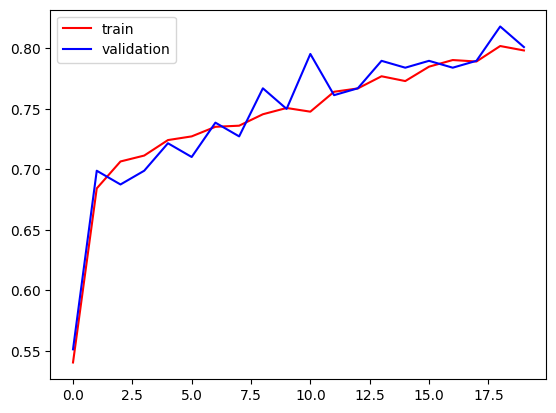

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

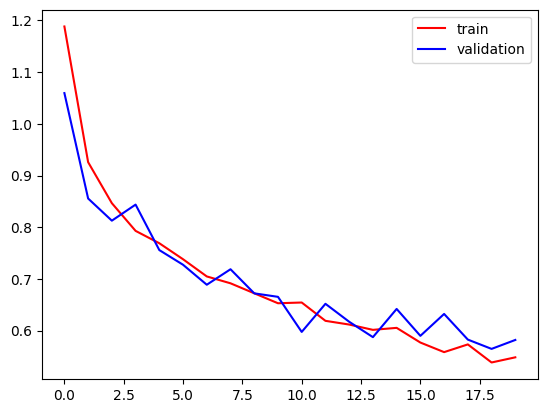

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, cohen_kappa_score, classification_report


In [ ]:
data_val_X=[]
val_y=[]


for j,i in zip(val['image_path'].values,val['diagnosis'].values):

  img=cv2.imread(j)
  img=cv2.resize(img,(224,224))
  img=img/255.0
  data_val_X.append(img)
  val_y.append(i)
data_val_X=np.array(data_val_X)
val_y=np.array(val_y)

In [ ]:
y_pred=model.predict(data_val_X)

6/6 [==============================] - 0s 82ms/step


In [ ]:
y_pred_f=np.argmax(y_pred,axis=1)

In [ ]:
y_pred_f,val_y

(array([0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 1, 0, 4, 4, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
        4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0,
        0, 0, 3, 0, 0, 4, 4, 0, 3, 2, 0, 4, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0]),
 array([2, 4, 0, 4, 2, 2, 2, 0, 0, 0, 2, 4, 0, 3, 0, 2, 2, 0, 2, 1, 0, 2,
        0, 3, 0, 2, 2, 0, 2, 0, 3, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 3, 2,
        2, 1, 3, 4, 0, 0, 0, 2, 4, 2, 2, 0, 0, 0, 0, 2, 0, 0, 4, 2, 2, 0,
        4, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0,
        0, 0, 3, 2, 0, 4, 4, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 4,
    

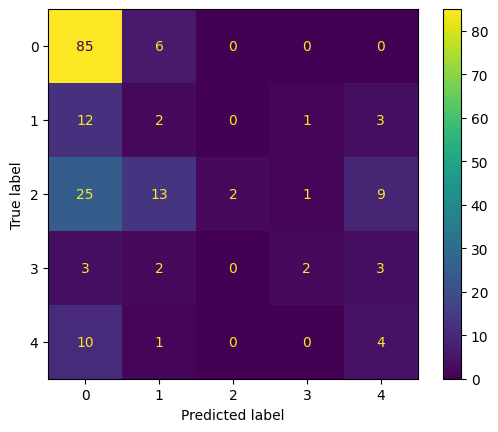

In [ ]:
confusion_matrix(val_y,y_pred_f)
ConfusionMatrixDisplay(confusion_matrix(val_y,y_pred_f)).plot()

In [ ]:
accuracy_score(val_y,y_pred_f)

0.5163043478260869

In [ ]:
cohen_kappa_score(val_y,y_pred_f,weights='quadratic')

0.3827340031729244

In [ ]:
print(classification_report(val_y,y_pred_f))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        91
           1       0.45      0.70      0.55        54
           2       0.57      0.43      0.49        65
           3       0.51      0.49      0.50        53
           4       0.54      0.52      0.53        50

    accuracy                           0.59       313
   macro avg       0.58      0.57      0.57       313
weighted avg       0.61      0.59      0.59       313



In [ ]:
#visualizing filters

In [ ]:
#for pretraned model

for i in range(len(model.layers[0].layers)):
  layer = model.layers[0].layers[i]
 # check for convolutional layer
  if 'conv' not in layer.name:
    continue
 # summarize output shape
  print(i, layer.name, layer.output.shape)

1 conv2d_94 (None, 111, 111, 32)
4 conv2d_95 (None, 109, 109, 32)
7 conv2d_96 (None, 109, 109, 64)
11 conv2d_97 (None, 54, 54, 80)
14 conv2d_98 (None, 52, 52, 192)
18 conv2d_102 (None, 25, 25, 64)
21 conv2d_100 (None, 25, 25, 48)
22 conv2d_103 (None, 25, 25, 96)
28 conv2d_99 (None, 25, 25, 64)
29 conv2d_101 (None, 25, 25, 64)
30 conv2d_104 (None, 25, 25, 96)
31 conv2d_105 (None, 25, 25, 32)
41 conv2d_109 (None, 25, 25, 64)
44 conv2d_107 (None, 25, 25, 48)
45 conv2d_110 (None, 25, 25, 96)
51 conv2d_106 (None, 25, 25, 64)
52 conv2d_108 (None, 25, 25, 64)
53 conv2d_111 (None, 25, 25, 96)
54 conv2d_112 (None, 25, 25, 64)
64 conv2d_116 (None, 25, 25, 64)
67 conv2d_114 (None, 25, 25, 48)
68 conv2d_117 (None, 25, 25, 96)
74 conv2d_113 (None, 25, 25, 64)
75 conv2d_115 (None, 25, 25, 64)
76 conv2d_118 (None, 25, 25, 96)
77 conv2d_119 (None, 25, 25, 64)
87 conv2d_121 (None, 25, 25, 64)
90 conv2d_122 (None, 25, 25, 96)
93 conv2d_120 (None, 12, 12, 384)
94 conv2d_123 (None, 12, 12, 96)
101 conv2d_

In [ ]:
vis_model = Model(inputs=model.layers[0].inputs, outputs=model.layers[0].layers[299].output)

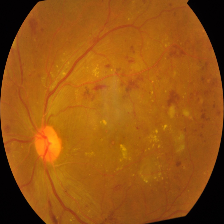

In [ ]:
img=cv2.imread(val[val['diagnosis']==3]['image_path'].iloc[0])
img=cv2.resize(img,(224,224))

cv2_imshow(img)
img=img/255.0

In [ ]:
img = np.expand_dims(img, axis=0)
feature_maps = vis_model.predict(img)

1/1 [==============================] - 2s 2s/step


In [ ]:
feature_maps.shape

(1, 5, 5, 192)

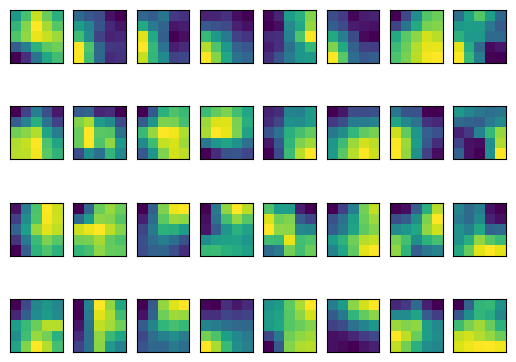

In [ ]:
import matplotlib.pyplot
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(4):
  for _ in range(square):
    # specify subplot and turn of axis
    ax = plt.subplot(4, 8, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(feature_maps[0, :, :, ix-1])#, cmap='gray')
    ix += 1
plt.show()

In [ ]:
#hyperparameter tuning

In [ ]:
# 1. appropiate optimizer
# 2. no. of nodes
# 3. no. of layers
# 4. all in one

In [ ]:
!pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
#appropiate optimizer
def build_model(hp): #hp is hyperparameter

  convo_base=keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
  )

  model = Sequential()

  model.add(convo_base)
  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Dropout(0.5))
  model.add(Dense(1024,activation='relu',kernel_initializer=initializer))
  model.add(Dense(5, activation='softmax',kernel_initializer=initializer))

  optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])

  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

In [ ]:
tuner.search(train_generator,epochs=5,validation_data=val_generator)

Trial 4 Complete [00h 06m 40s]
val_accuracy: 0.7336956262588501

Best val_accuracy So Far: 0.7880434989929199
Total elapsed time: 00h 26m 13s


In [ ]:
tuner.get_best_hyperparameters()[0].values #best model is at 0th loc

{'optimizer': 'sgd'}

In [ ]:
m=tuner.get_best_models(num_models=1)[0] #because we need only best model

In [ ]:
m.summary()

#now we can train this best model

#model.fit(train_generator,epochs=100,initial_epoch=6,validation_data=val_generator) because we have to start from 6th epoch

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 23906085 (91.19 MB)
Trainable params: 23871653 (91.06 MB)
Non-trainable params: 34432 (134.50 KB)
__________

In [ ]:
#nodes in layer
def build_model(hp): #hp is hyperparameter

  convo_base=keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
  )

  model = Sequential()

  units= hp.Int('units',min_value=512,max_value=2048,step=512)

  model.add(convo_base)
  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Dropout(0.5))
  model.add(Dense(units=units,activation='relu',kernel_initializer=initializer))
  model.add(Dense(5, activation='softmax',kernel_initializer=initializer))


  model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir') #it store file in json format so have to specify directory

In [ ]:
tuner.search(train_generator,epochs=5,validation_data=val_generator)

Trial 4 Complete [00h 06m 18s]
val_accuracy: 0.8152173757553101

Best val_accuracy So Far: 0.8260869383811951
Total elapsed time: 00h 25m 41s


In [ ]:
tuner.get_best_hyperparameters()[0].values #best model is at 0th loc

{'units': 512}

In [ ]:
# no. of layers
def build_model(hp): #hp is hyperparameter

  convo_base=keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
  )

  model = Sequential()

  model.add(convo_base)
  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Dropout(0.5))

  for i in range(hp.Int('num_layers',min_value=1,max_value=3)):

    if i==1:
      units=512
    else:
      units=128
    model.add(Dense(units=units,activation='relu',kernel_initializer=initializer))

  model.add(Dense(5, activation='softmax',kernel_initializer=initializer))


  model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='numLayers') #it store file in json format so have to specify directory

In [ ]:
tuner.search(train_generator,epochs=5,validation_data=val_generator)

Trial 3 Complete [00h 06m 18s]
val_accuracy: 0.79347825050354

Best val_accuracy So Far: 0.820652186870575
Total elapsed time: 00h 19m 42s


In [ ]:
tuner.get_best_hyperparameters()[0].values #best model is at 0th loc

{'num_layers': 2}

In [ ]:
#learning rate
def build_model(hp): #hp is hyperparameter

  convo_base=keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
  )

  model = Sequential()

  model.add(convo_base)
  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Dropout(0.5))
  model.add(Dense(512,activation='relu',kernel_initializer=initializer))
  model.add(Dense(5, activation='softmax',kernel_initializer=initializer))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 5e-4])

  model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate),metrics=['accuracy'])

  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir1',project_name='numLayers') #it store file in json format so have to specify directory

In [ ]:
tuner.search(train_generator,epochs=5,validation_data=val_generator)

Trial 5 Complete [00h 06m 13s]
val_accuracy: 0.7554348111152649

Best val_accuracy So Far: 0.8152173757553101
Total elapsed time: 00h 31m 56s


In [ ]:
tuner.get_best_hyperparameters()[0].values #best model is at 0th loc

{'learning_rate': 0.01}

In [ ]:
#dropouts

#learning rate
def build_model(hp): #hp is hyperparameter

  convo_base=keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
  )

  model = Sequential()

  model.add(convo_base)
  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Dropout(hp.Choice('dropouts', values=[0.2, 0.3, 0.5])))
  model.add(Dense(512,activation='relu',kernel_initializer=initializer))
  model.add(Dense(5, activation='softmax',kernel_initializer=initializer))


  model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir2',project_name='dropouts') #it store file in json format so have to specify directory

In [ ]:
tuner.search(train_generator,epochs=5,validation_data=val_generator)

Trial 3 Complete [00h 06m 18s]
val_accuracy: 0.7880434989929199

Best val_accuracy So Far: 0.842391312122345
Total elapsed time: 00h 20m 55s


In [ ]:
tuner.get_best_hyperparameters()[0].values #best model is at 0th loc

{'dropouts': 0.2}

In [ ]:
#for all together

# no. of layers
def build_model(hp): #hp is hyperparameter

  convo_base=keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
  )

  model = Sequential()

  model.add(convo_base)
  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Dropout(hp.Choice('dropouts', values=[0.1,0.2, 0.5])))


  model.add(Dense(units=hp.Int('units',min_value=128,max_value=2048,step=512),activation=hp.Choice('activation', values=['relu','leaky_relu']),kernel_initializer=initializer))

  model.add(Dense(5, activation='softmax',kernel_initializer=initializer))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 5e-5])
  model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate),metrics=['accuracy'])

  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=10,directory='mydir_final1',project_name='all') #it store file in json format so have to specify directory

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
tuner.search(train_generator,epochs=5,validation_data=val_generator)

Trial 10 Complete [00h 06m 30s]
val_accuracy: 0.614130437374115

Best val_accuracy So Far: 0.8152173757553101
Total elapsed time: 01h 05m 13s


In [ ]:
tuner.get_best_hyperparameters()[0].values #best model is at 0th loc

{'dropouts': 0.1,
 'units': 1664,
 'activation': 'leaky_relu',
 'learning_rate': 0.01}

In [ ]:
m=tuner.get_best_models(num_models=1)[0] #because we need only best model

In [ ]:
m.fit(train_generator,epochs=20,initial_epoch=6,validation_data=val_generator)

Epoch 7/20
206/206 [==============================] - 85s 334ms/step - loss: 0.4638 - accuracy: 0.8291 - val_loss: 0.5778 - val_accuracy: 0.8098
Epoch 8/20
206/206 [==============================] - 69s 334ms/step - loss: 0.4319 - accuracy: 0.8382 - val_loss: 0.5975 - val_accuracy: 0.7880
Epoch 9/20
206/206 [==============================] - 68s 331ms/step - loss: 0.4153 - accuracy: 0.8418 - val_loss: 0.6093 - val_accuracy: 0.8098
Epoch 10/20
206/206 [==============================] - 68s 327ms/step - loss: 0.3924 - accuracy: 0.8546 - val_loss: 0.5600 - val_accuracy: 0.8098
Epoch 11/20
206/206 [==============================] - 66s 318ms/step - loss: 0.3747 - accuracy: 0.8567 - val_loss: 0.6039 - val_accuracy: 0.8152
Epoch 12/20
206/206 [==============================] - 68s 330ms/step - loss: 0.3460 - accuracy: 0.8685 - val_loss: 0.6191 - val_accuracy: 0.8152
Epoch 13/20
206/206 [==============================] - 69s 334ms/step - loss: 0.3473 - accuracy: 0.8652 - val_loss: 0.5758 - va

In [ ]:
#gradcam

In [ ]:
imsize = (224,224,3)
from tensorflow.keras import layers



input = layers.Input(shape=(imsize[0], imsize[1], imsize[2]))
base_model = tensorflow.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_tensor=input,
                                           input_shape=(imsize[0], imsize[1], imsize[2]))
# base_model.trainable = False

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_564 (Conv2D)         (None, 111, 111, 32)         864       ['input_7[0][0]']             
                                                                                                  
 batch_normalization_564 (B  (None, 111, 111, 32)         96        ['conv2d_564[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_564 (Activation  (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
base_model.trainable = True

set_trainable = False

for layer in base_model.layers:
  #if layer.name == 'conv2d_81':
  if layer.name=='input_7':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False



for layer in base_model.layers:
  print(layer.name,layer.trainable)


input_7 True
conv2d_564 True
batch_normalization_564 True
activation_564 True
conv2d_565 True
batch_normalization_565 True
activation_565 True
conv2d_566 True
batch_normalization_566 True
activation_566 True
max_pooling2d_24 True
conv2d_567 True
batch_normalization_567 True
activation_567 True
conv2d_568 True
batch_normalization_568 True
activation_568 True
max_pooling2d_25 True
conv2d_572 True
batch_normalization_572 True
activation_572 True
conv2d_570 True
conv2d_573 True
batch_normalization_570 True
batch_normalization_573 True
activation_570 True
activation_573 True
average_pooling2d_54 True
conv2d_569 True
conv2d_571 True
conv2d_574 True
conv2d_575 True
batch_normalization_569 True
batch_normalization_571 True
batch_normalization_574 True
batch_normalization_575 True
activation_569 True
activation_571 True
activation_574 True
activation_575 True
mixed0 True
conv2d_579 True
batch_normalization_579 True
activation_579 True
conv2d_577 True
conv2d_580 True
batch_normalization_577 True

In [ ]:
flat = layers.Flatten()
dropped = layers.Dropout(0.2)
global_average_layer = tensorflow.keras.layers.GlobalAveragePooling2D()

fc1 = layers.Dense(512, activation='relu')
prediction = layers.Dense(5, activation='softmax', name='output')

block5_pool = base_model.get_layer('mixed10')
x = global_average_layer(block5_pool.output)
x = dropped(x)
x = fc1(x)
x = prediction(x)

grad_model = tensorflow.keras.models.Model(inputs = input, outputs = x)
grad_model.compile(optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history=grad_model.fit(
    train_generator,
    steps_per_epoch=3294//batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=184//batch_size)#,callbacks=callback_list)

Epoch 1/20
205/205 [==============================] - 94s 384ms/step - loss: 1.1627 - accuracy: 0.5561 - val_loss: 1.0966 - val_accuracy: 0.5909
Epoch 2/20
205/205 [==============================] - 74s 360ms/step - loss: 0.9074 - accuracy: 0.6833 - val_loss: 0.9144 - val_accuracy: 0.6705
Epoch 3/20
205/205 [==============================] - 75s 365ms/step - loss: 0.8264 - accuracy: 0.7038 - val_loss: 0.8130 - val_accuracy: 0.7273
Epoch 4/20
205/205 [==============================] - 73s 356ms/step - loss: 0.7787 - accuracy: 0.7169 - val_loss: 0.7907 - val_accuracy: 0.6989
Epoch 5/20
205/205 [==============================] - 73s 353ms/step - loss: 0.7459 - accuracy: 0.7233 - val_loss: 0.6901 - val_accuracy: 0.7500
Epoch 6/20
205/205 [==============================] - 75s 365ms/step - loss: 0.7187 - accuracy: 0.7294 - val_loss: 0.6603 - val_accuracy: 0.7670
Epoch 7/20
205/205 [==============================] - 73s 354ms/step - loss: 0.6992 - accuracy: 0.7404 - val_loss: 0.6766 - val_ac

In [ ]:
LAYER_NAME='mixed10'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model


def grad_cam(model, img,
             layer_name="mixed10", label_name=None,
             category_id=None):

    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape:
        conv_output, predictions = heatmap_model(img_tensor)
        if category_id is None:
            category_id = np.argmax(predictions[0])
        if label_name is not None:
            print(label_name[category_id])
        output = predictions[:, category_id]
        grads = gtape.gradient(output, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return np.squeeze(heatmap)

def grad_cam_plus(model, img,
                  layer_name="mixed10", label_name=None,
                  category_id=None):

    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)
    img=cv2.resize(img, (224, 224))

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))



In [ ]:
img_path=val[val['diagnosis']==2]['image_path'].iloc[0]
img=cv2.imread(img_path)
img=cv2.resize(img, (224, 224))

In [ ]:
t2=grad_cam(grad_model, img,layer_name="mixed10", label_name=None,category_id=None)

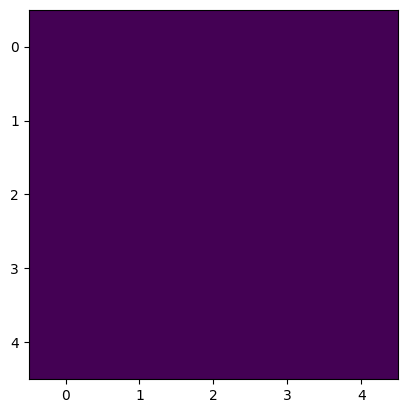

In [ ]:
plt.figure()
plt.imshow(t2)
plt.show()

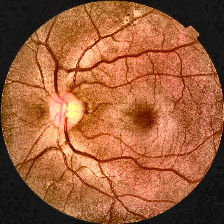

In [ ]:
cv2_imshow(img)

<ipython-input-217-bb63f5253efb>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


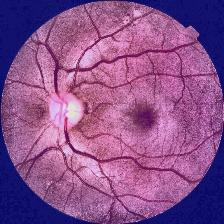

In [ ]:
save_and_display_gradcam(img_path, t2)

In [ ]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()